# NV center Registers in Spin Baths

In [1]:
%load_ext autoreload
%autoreload 2

import os
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('NVcenter')]+ 'NVcenter'
os.chdir(ROOT_DIR)

from qDNA import *
from NVcenter import *

In [2]:
# parameters

# C13_pos = (8.713976612205478e-10, 0.0, 1.901805289026213e-10) # Suter
C13_pos = (8.728883757198979e-10, 0.0, 1.8558998769620693e-10) # Dominik
# C13_pos = (4.722331100730915e-10, 0.0, 1.030637866442101e-10) # Dennis 

register_config = [('NV', (0, 0, 0), 0, {}), ('C13', C13_pos, 0, {})]
bath_configs = list( load_spin_baths('Dominik_C13', DATA_DIR).values() )[:10]

target_state = 1/np.sqrt(2) * ( q.tensor(q.basis(2,0), q.basis(2,0)) + q.tensor(q.basis(2,1), q.basis(2,1)) )
target_dm = target_state * target_state.dag()

kwargs = dict(suter_method=True, instant_pulses=True, verbose=False,
             old_state=target_dm, target=target_dm, env_approx_level='no_bath')

## Simple Pulse Sequences

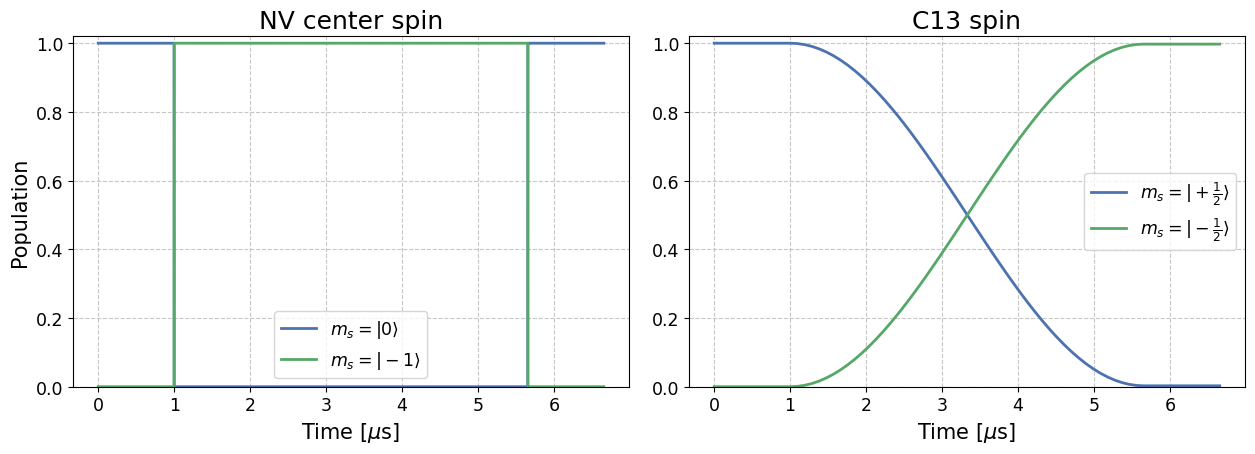

In [11]:
# pulse sequence to flip the C13 spin

# initialize the environment
env = Environment(register_config, bath_configs, **kwargs)
env.old_state = env.register_init_state
T = np.pi/(2*np.pi*np.sqrt((env.matrices[0][2,2]**2 + env.matrices[0][2,3]**2)) )
env.pulse_seq = [1e-6, T/2, 1e-6, np.pi, np.pi, 0, 0]

# define time steps
t_list = []
t_cum = env.cumulative_time_list
t_list.extend(np.linspace(0, t_cum[0]-1e-9, 5) )
for i in range(len(t_cum)-1):
    t_list.extend( np.linspace(t_cum[i]+1e-9, t_cum[i+1]-1e-9, 50) )

# calculate new states
new_states = env.calc_new_states_full(t_list)[0]

# plot the results
fig, ax = plot_pops(t_list, new_states)

## Effect of the spin bath for free time evolution

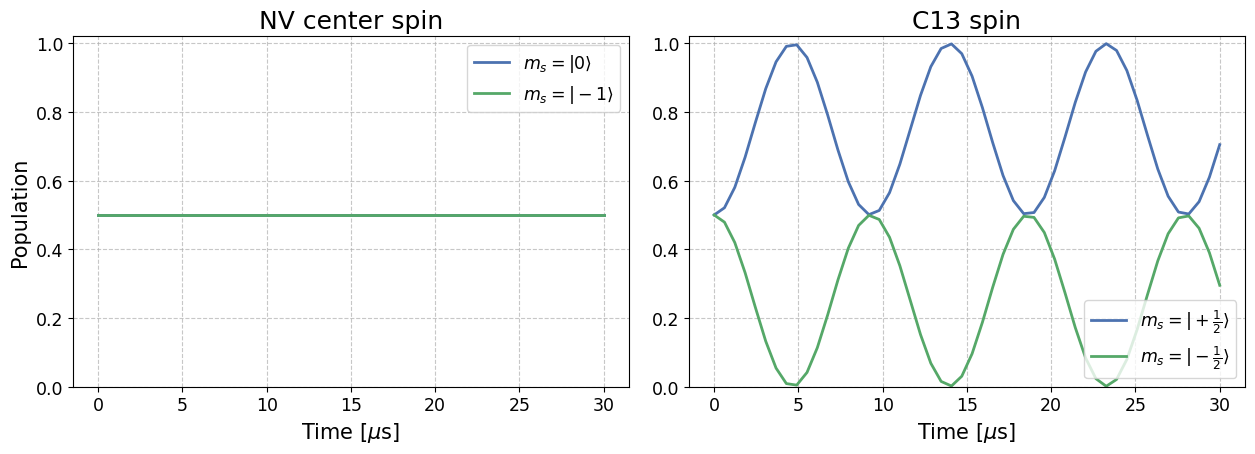

In [12]:
# free time evolution of the entangled Bell state between NV center and C13 spin (Dominik Fig. 4)

# initialize the environment
env = Environment(register_config, bath_configs, **kwargs)
env.pulse_seq = [30e-6]

# define time steps
t_list = np.linspace(0, env.total_time, 50)

# calculate new states
new_states = env.calc_new_states_full(t_list)[0]

# plot the results
fig, ax = plot_pops(t_list, new_states)

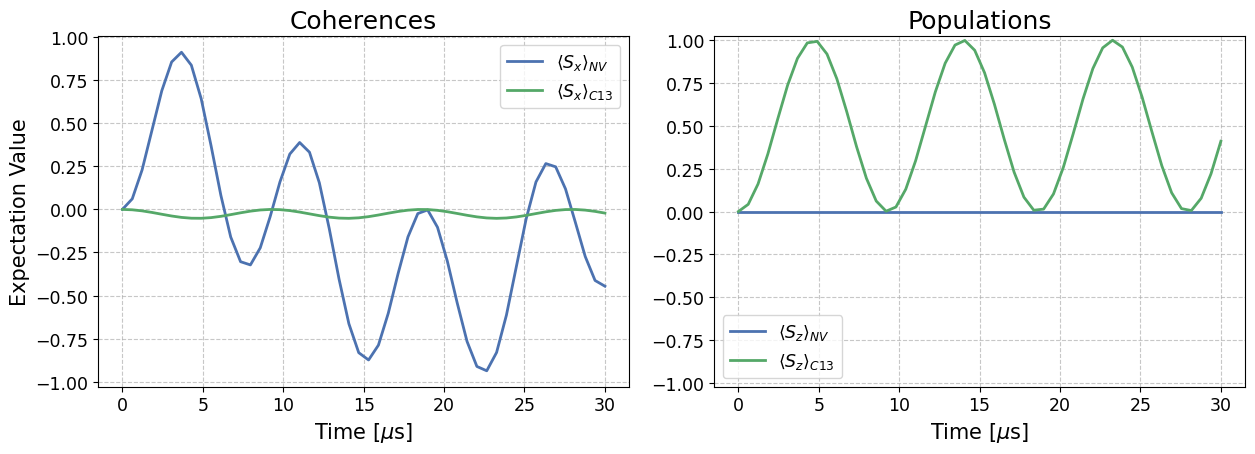

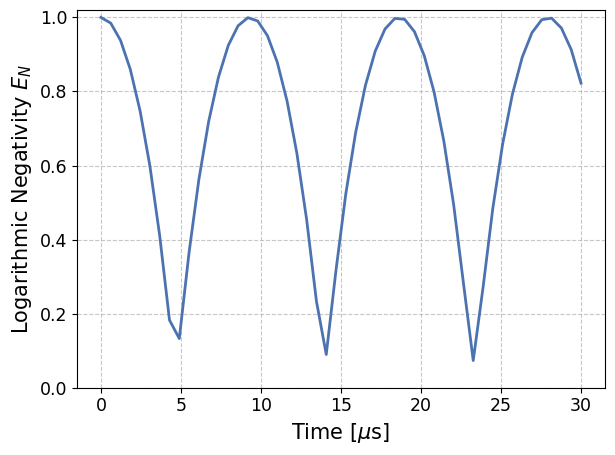

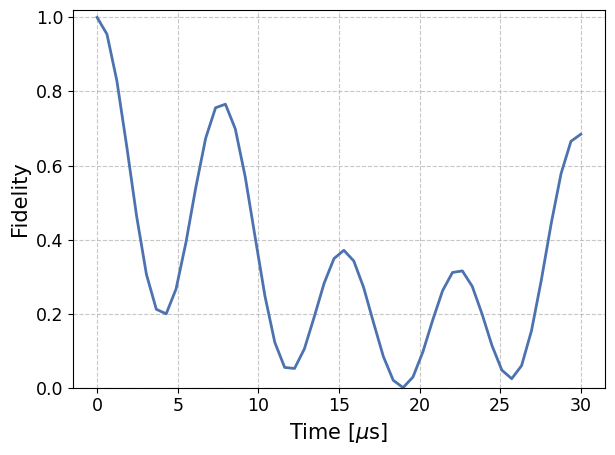

In [14]:
fig, ax = plot_exp_values(t_list, new_states)

log_negativities = [calc_logarithmic_negativity(new_state) for new_state in new_states] 
fig, ax = plot_log_negativity(t_list, log_negativities)

fidelities = [calc_fidelity(new_state, env.target) for new_state in new_states] 
fig, ax = plot_fids(t_list, fidelities)

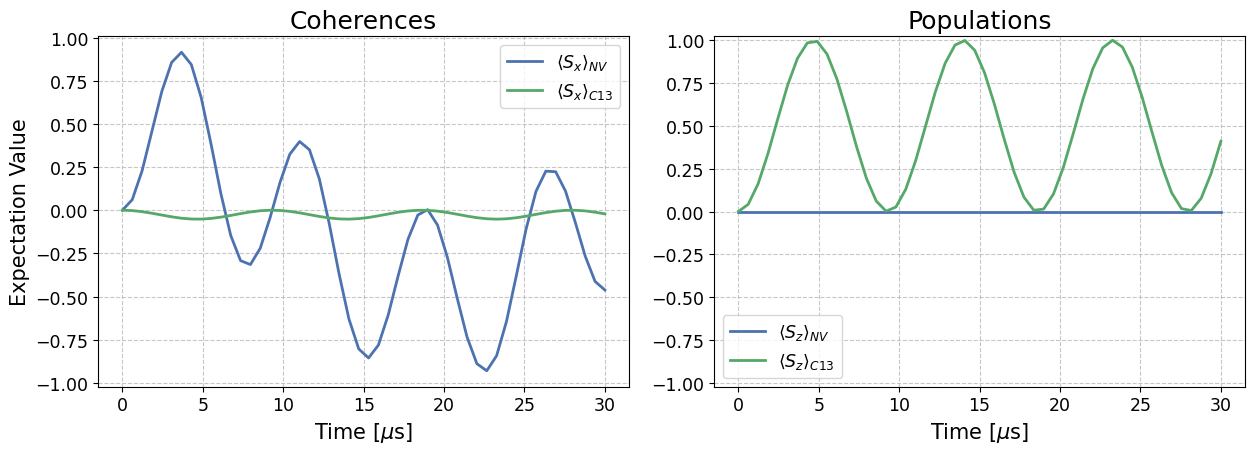

In [13]:
# gCCE0
fig, ax = plot_exp_values(t_list, new_states)

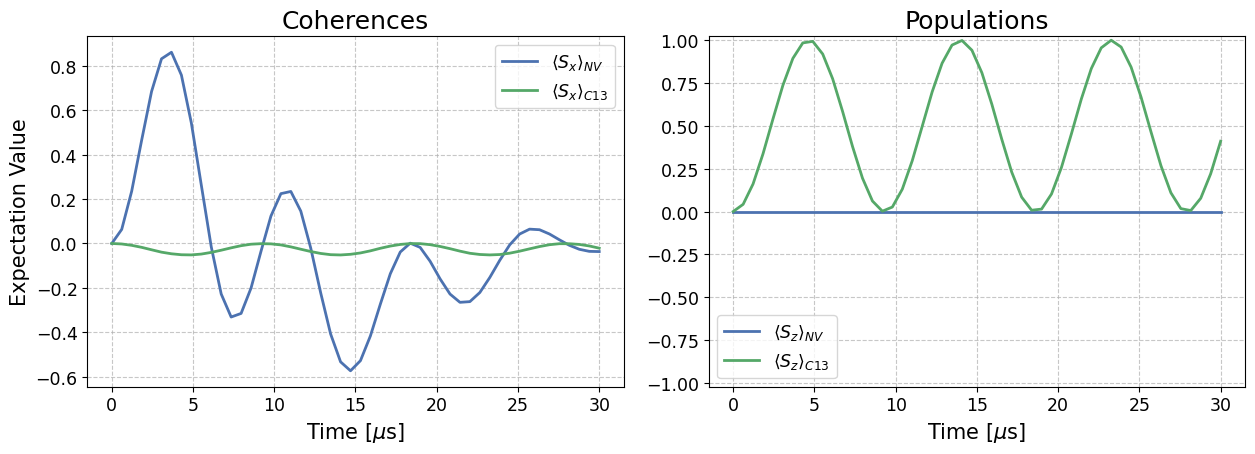

In [20]:
# gCCE1
fig, ax = plot_exp_values(t_list, new_states)

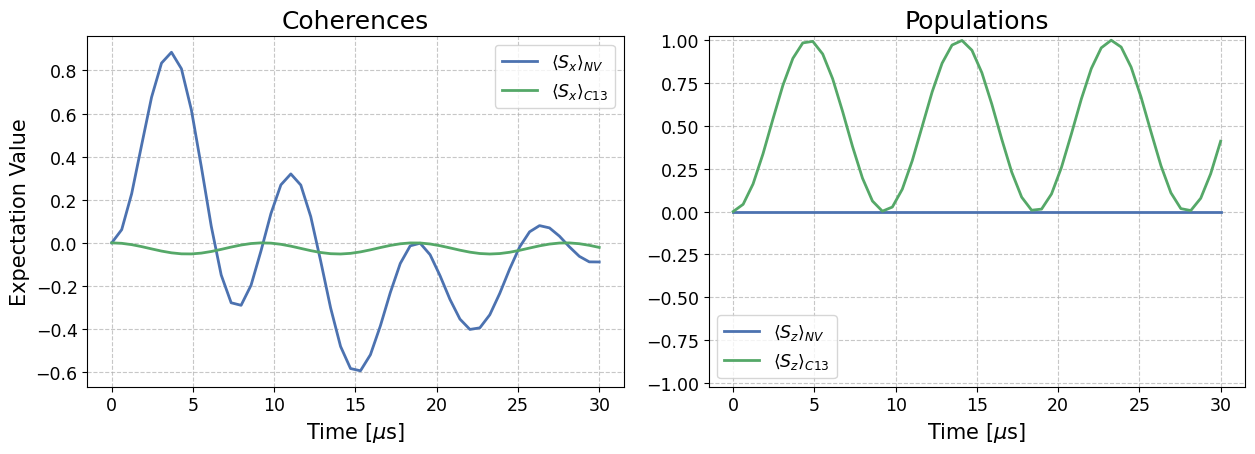

In [24]:
# full_bath
fig, ax = plot_exp_values(t_list, new_states)

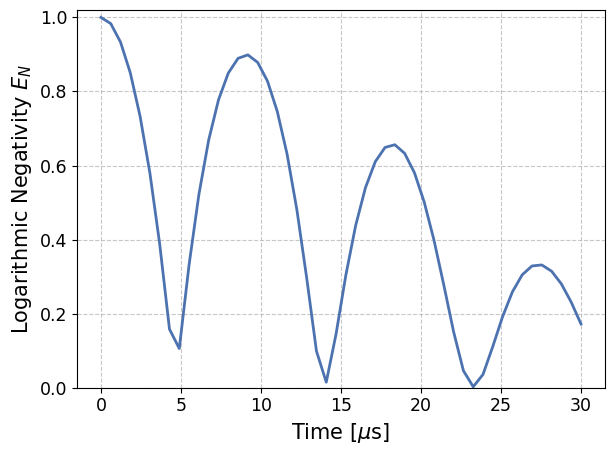

In [26]:
# full_bath
log_negativities = [calc_logarithmic_negativity(new_state) for new_state in new_states] 
fig, ax = plot_log_negativity(t_list, log_negativities)

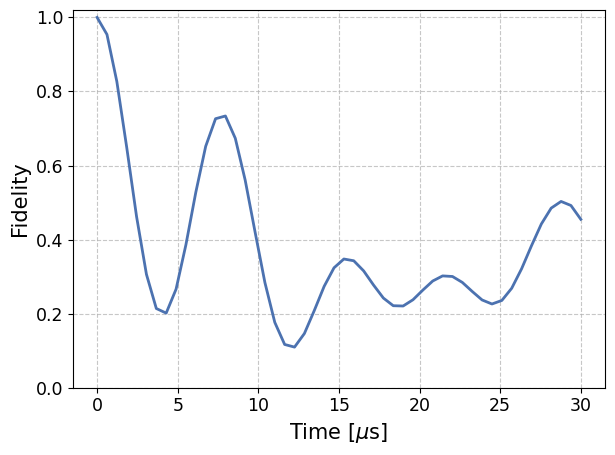

In [27]:
# full_bath
fidelities = [calc_fidelity(new_state) for new_state in new_states] 
fig, ax = plot_fids(t_list, fidelities)

## Prepare Bell state (Dominik) 

In [31]:
suter_method = True

    C13_pos = (8.713976612205478e-10, 0.0, 1.901805289026213e-10) # Suter
    C13_pos = (8.728883757198979e-10, 0.0, 1.8558998769620693e-10) # Dominik
    C13_pos = (4.722331100730915e-10, 0.0, 1.030637866442101e-10) # Dennis 

register_config = [('NV', (0, 0, 0), 0, {}), ('C13', C13_pos, 0, {})]
bath_config = SpinBath('C13', 0.02e-2, 2e-9, 3.5e-9).config
approx_level = 'no_bath'
kwargs = dict(suter_method=suter_method, instant_pulses=True, verbose=False)

In [32]:
ham = Hamiltonian(register_config, bath_config, approx_level, **kwargs)
print(ham.matrices[0])

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-79242.08751747      0.              0.              0.        ]
 [     0.          79242.08751747      0.              0.        ]
 [     0.              0.          -3242.08751736 -54999.99999998]
 [     0.              0.         -54999.99999998   3242.08751736]]


In [33]:
pulse_seq = [1e-9, 4.06e-6, 1.57e-6, 1.51e-6, 1.00, 3.58, 1.68, 0.69, 1.97, 0.50]
# pulse_seq = [0, 4.06620465e-6, 1.57022726e-6, 1.50788214e-6, 0.99813568, 3.57557112, 1.68300382, 0.69459264, 1.97327426, 0.50816523]
target_state = 1/np.sqrt(2) * ( q.tensor(q.basis(2,0), q.basis(2,0)) + q.tensor(q.basis(2,1), q.basis(2,1)) )
target_dm = target_state * target_state.dag()

pulse = Pulse(pulse_seq, register_config, bath_config, approx_level, target_dm, **kwargs)

Time: 0.0 s
Time: 0.47 s
Time: 0.47 s


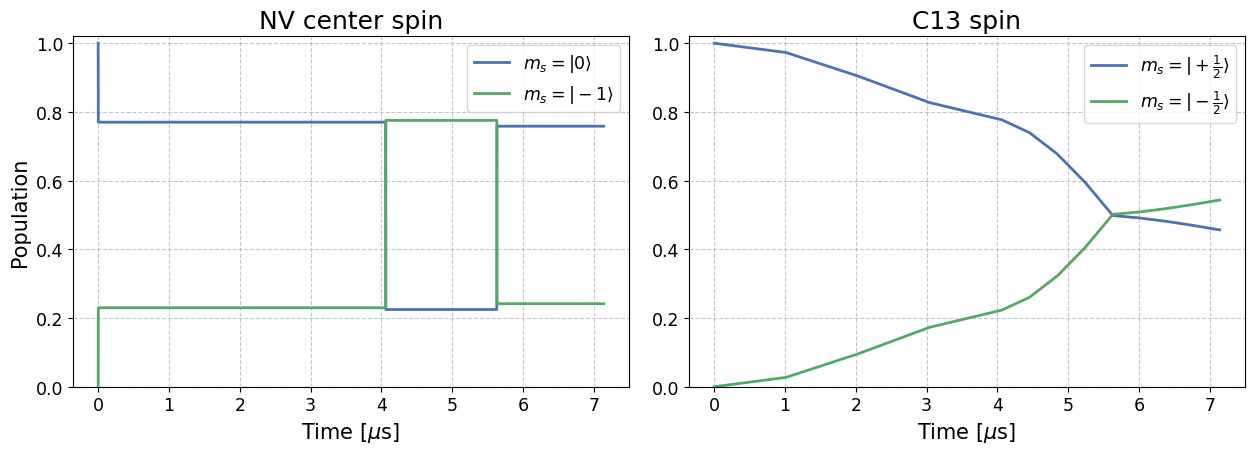

In [34]:
t_list = [0]
for i in range(len(pulse.cumulative_time_list)-1):
    t_list.extend( np.linspace(pulse.cumulative_time_list[i]+1e-9, pulse.cumulative_time_list[i+1]-1e-9, 5) )
    
new_states_full = pulse.calc_new_states_full(t_list)
fig, ax = plot_pops(t_list, new_states_full[0])

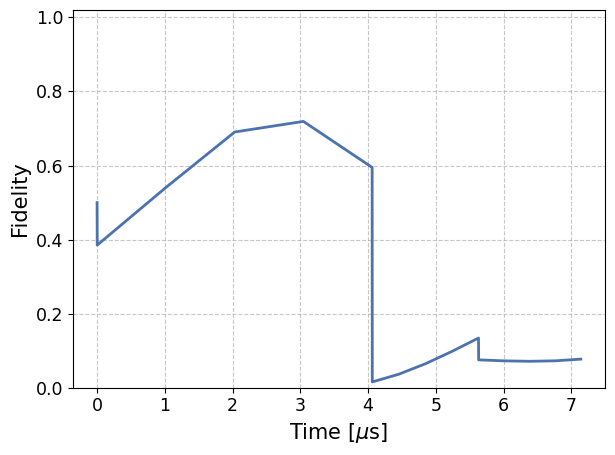

In [36]:
fidelities_full = pulse.calc_fidelities_full(new_states_full)
fig, ax = plot_fids(t_list, fidelities_full[0])